## Load LendingClub dataset

Source: Lending Club 2007-2020Q3    
https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1 

In [25]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('Loan_status_2007-2020Q3.csv', low_memory=False)

print(df.head())

   Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501     5000.0       5000.0           4975.0   36 months   
1           1  1077430     2500.0       2500.0           2500.0   60 months   
2           2  1077175     2400.0       2400.0           2400.0   36 months   
3           3  1076863    10000.0      10000.0          10000.0   36 months   
4           4  1075358     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_start_date  \
0   10.65%       162.87     B        B2  ...                 NaN   
1   15.27%        59.83     C        C4  ...                 NaN   
2   15.96%        84.33     C        C5  ...                 NaN   
3   13.49%       339.31     C        C1  ...                 NaN   
4   12.69%        67.79     B        B5  ...                 NaN   

  hardship_end_date payment_plan_start_date  hardship_length hardship_dpd  \
0               NaN                    

## Generate issue_year from issue_d

In [20]:
#Check the year distribution

# 'issue_d' 컬럼을 datetime 형태로 변환
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# datetime에서 연도만 추출하여 새로운 컬럼에 저장
df['issue_year'] = df['issue_d'].dt.year

# 새로운 컬럼 'issue_year'의 각 범주별 데이터 개수 확인
issue_year_counts = df['issue_year'].value_counts()

# 결과를 오름차순으로 정렬
issue_year_counts_sorted = issue_year_counts.sort_index()

# 정렬된 결과 출력
print(issue_year_counts_sorted)

2007.0       603
2008.0      2393
2009.0      5281
2010.0     12537
2011.0     21721
2012.0     53367
2013.0    134814
2014.0    235629
2015.0    421095
2016.0    434407
2017.0    443579
2018.0    495242
2019.0    518107
2020.0    146717
Name: issue_year, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


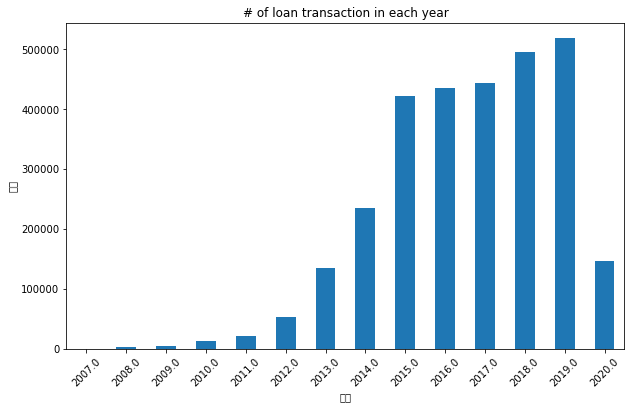

In [3]:
import matplotlib.pyplot as plt

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
issue_year_counts_sorted.plot(kind='bar')  # 막대 그래프로 표시
plt.title('# of loan transaction in each year')  # 그래프 제목 설정
plt.xlabel('연도')  # x축 레이블 설정
plt.ylabel('빈도')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()  # 그래프 표시


### NOTE: The number of data is so large that we decided to use only the last two years of data.

In [21]:
# 2019, 2020년도 데이터를 제외하고 나머지 데이터 삭제
df = df[df['issue_year'].isin([2019, 2020])]

# 결과 확인
print(df.head())

        Unnamed: 0         id  loan_amnt  funded_amnt  funded_amnt_inv  \
967308           0  149203043    24000.0      24000.0          24000.0   
967309           1  149354242    18500.0      18500.0          18500.0   
967310           2  149355875    24000.0      24000.0          24000.0   
967311           3  149437986     2800.0       2800.0           2775.0   
967312           4  149511512     8800.0       8800.0           8800.0   

              term int_rate  installment grade sub_grade  ...  \
967308   60 months   13.90%       557.20     C        C1  ...   
967309   60 months   14.74%       437.60     C        C2  ...   
967310   36 months    8.19%       754.18     A        A4  ...   
967311   36 months    8.19%        87.99     A        A4  ...   
967312   36 months   20.00%       327.04     D        D2  ...   

       hardship_end_date payment_plan_start_date hardship_length  \
967308          Jun-2020                Apr-2020             2.0   
967309               NaN    

In [22]:
df.to_csv('df_data.csv', index=False)

## Load a new dataset

In [3]:
df = pd.read_csv('df_data.csv', low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664824 entries, 0 to 664823
Columns: 143 entries, Unnamed: 0 to issue_year
dtypes: float64(107), int64(2), object(34)
memory usage: 725.3+ MB


### Check null values

In [5]:
#Check null values

import numpy as np

# 결측치 비율 계산
missing_ratio = df.isnull().mean()

# 결측치 비율별 컬럼 개수를 저장할 딕셔너리
columns_count_per_threshold = {}

# 5%부터 95%까지 5% 단위로 반복
for threshold in np.arange(0.1, 1, 0.1):
    # 해당 퍼센트 이하의 결측치를 가진 컬럼의 개수 계산
    count = (missing_ratio <= threshold).sum()
    # 결과 저장
    columns_count_per_threshold[f"{int(threshold * 100)}%"] = count

# 결과를 DataFrame으로 변환하여 출력
result_df = pd.DataFrame(list(columns_count_per_threshold.items()), columns=['Missing value ratio or less', 'Number of columns'])
print(result_df)

  Missing value ratio or less  Number of columns
0                         10%                105
1                         20%                109
2                         30%                109
3                         40%                109
4                         50%                109
5                         60%                110
6                         70%                110
7                         80%                112
8                         90%                143


### Considering only those columns which have null values less than 10% in that particular column. But there are too many features(105 features), so we have to minimize the features available. 

In [24]:
# 결측치 비율 계산
missing_ratio = df.isnull().mean()

# 결측치 비율이 10% 이하인 컬럼 선택
selected_columns = missing_ratio[missing_ratio <= 0.1].index

# 선택된 컬럼들만을 포함하는 새로운 DataFrame 생성
df = df[selected_columns]

# 결측치 비율이 10% 이하인 컬럼의 개수 출력
print(f"Number of columns which have null values less than 10% in that particular column: {len(selected_columns)}")



Number of columns which have null values less than 10% in that particular column: 105


In [10]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,issue_year
967308,0,149203043,24000.0,24000.0,24000.0,60 months,13.90%,557.20,C,C1,...,66.7,0.0,0.0,255961.0,73738.0,10400.0,77261.0,Y,N,2019.0
967309,1,149354242,18500.0,18500.0,18500.0,60 months,14.74%,437.60,C,C2,...,0.0,0.0,0.0,44790.0,22602.0,12000.0,22190.0,N,N,2019.0
967310,2,149355875,24000.0,24000.0,24000.0,36 months,8.19%,754.18,A,A4,...,28.6,0.0,0.0,611066.0,139144.0,28500.0,187566.0,N,N,2019.0
967311,3,149437986,2800.0,2800.0,2775.0,36 months,8.19%,87.99,A,A4,...,0.0,0.0,0.0,28900.0,5289.0,28900.0,0.0,N,N,2019.0
967312,4,149511512,8800.0,8800.0,8800.0,36 months,20.00%,327.04,D,D2,...,33.3,0.0,0.0,11600.0,5493.0,9000.0,0.0,N,N,2019.0


#####  So now that we We have chosen a total of 16 variables for analysis.
### Loan Dataset Columns
- **loan_amnt**: the amount of the loan
- **annual_inc**: the annual income of the borrower
- **term**: the term of the loan (36 or 60 months)
- **int_rate**: the interest rate of the loan
- **installment**: the monthly payment of the loan
- **grade**: the grade assigned by LendingClub based on the creditworthiness of the borrower
- **purpose**: the purpose of the loan
- **dti**: the debt-to-income ratio of the borrower
- **total_acc**: the total number of credit lines in the borrower's credit file
- **delinq_2yrs**: the number of delinquencies in the past 2 years
- **emp_length**: the length of employment of the borrower
- **home_ownership**: the type of home ownership of the borrower
- **last_fico_range_high**
- **last_fico_range_low**
- **loan status**

In [5]:
selected_columns = [
    'loan_amnt', 'annual_inc', 'term', 'int_rate', 'installment', 'grade', 'purpose', 'loan_status', 
    'dti', 'last_fico_range_high', 'last_fico_range_low', 'total_acc', 'delinq_2yrs', 'emp_length', 'issue_year', 'home_ownership'
    
]
df = df[selected_columns]
df

,loan_amnt,annual_inc,term,int_rate,installment,grade,purpose,loan_status,dti,last_fico_range_high,last_fico_range_low,total_acc,delinq_2yrs,emp_length,issue_year,home_ownership
0,24000.0,86000.0,60 months,13.90%,557.20,C,major_purchase,Current,23.54,659.0,655.0,28.0,1.0,10+ years,2019.0,MORTGAGE
1,18500.0,43000.0,60 months,14.74%,437.60,C,debt_consolidation,Current,19.73,789.0,785.0,27.0,0.0,NaN,2019.0,MORTGAGE
2,24000.0,329991.0,36 months,8.19%,754.18,A,debt_consolidation,Current,20.70,739.0,735.0,39.0,0.0,10+ years,2019.0,MORTGAGE
3,2800.0,48500.0,36 months,8.19%,87.99,A,credit_card,Current,3.07,694.0,690.0,4.0,1.0,2 years,2019.0,RENT
4,8800.0,24000.0,36 months,20.00%,327.04,D,debt_consolidation,Current,9.45,684.0,680.0,7.0,0.0,3 years,2019.0,RENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664819,22500.0,50000.0,36 months,20.74%,844.69,C,debt_consolidation,Current,35.98,674.0,670.0,10.0,0.0,3 years,2020.0,OWN
664820,6000.0,38000.0,36 months,20.74%,225.26,C,home_improvement,Current,38.50,689.0,685.0,18.0,0.0,9 years,2020.0,MORTGAGE
664821,24000.0,136000.0,36 months,19.12%,881.21,C,credit_card,Current,14.31,684.0,680.0,39.0,3.0,4 years,2020.0,RENT
664822,31550.0,104000.0,36 months,19.12%,1158.42,C,small_business,Current,2.57,709.0,705.0,12.0,0.0,3 years,2020.0,MORTGAGE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664824 entries, 0 to 664823
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             664824 non-null  float64
 1   annual_inc            664824 non-null  float64
 2   term                  664824 non-null  object 
 3   int_rate              664824 non-null  object 
 4   installment           664824 non-null  float64
 5   grade                 664824 non-null  object 
 6   purpose               664824 non-null  object 
 7   loan_status           664824 non-null  object 
 8   dti                   663427 non-null  float64
 9   last_fico_range_high  664824 non-null  float64
 10  last_fico_range_low   664824 non-null  float64
 11  total_acc             664824 non-null  float64
 12  delinq_2yrs           664824 non-null  float64
 13  emp_length            606511 non-null  object 
 14  issue_year            664824 non-null  float64
 15  

### Loan Status

In [7]:
#loan status 전처리 시작
df['loan_status'].value_counts()

Current               570868
Fully Paid             66068
Charged Off            13543
Late (31-120 days)      6622
In Grace Period         4384
Issued                  2062
Late (16-30 days)       1197
Default                   80
Name: loan_status, dtype: int64

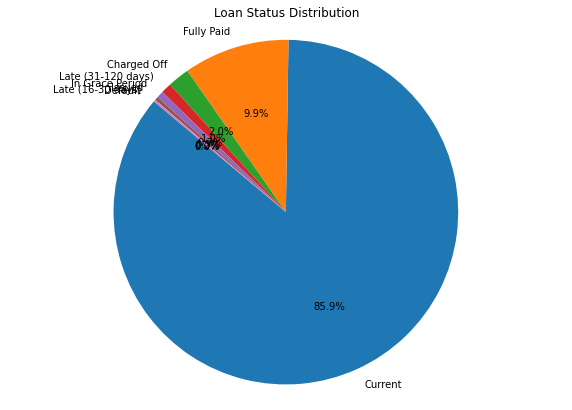

In [8]:
import matplotlib.pyplot as plt

# 'loan_status' 컬럼의 값에 대한 분포를 확인하기 위해 value_counts() 함수를 사용합니다.
status_counts = df['loan_status'].value_counts()

# 원형 그래프를 그리기 위해 plt.pie() 함수를 사용합니다.
# autopct 파라미터를 사용하여 원형 그래프의 각 부분에 퍼센트 값을 표시합니다.
plt.figure(figsize=(10, 7))  # 그래프의 크기를 설정합니다.
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원형 그래프가 원형으로 보이도록 설정합니다.
plt.title('Loan Status Distribution')  # 그래프의 제목을 설정합니다.
plt.show()  # 그래프를 화면에 표시합니다.

### As we can see there are so many labels in loan_status but i want my model to predict whether borrower will pay back the money well at the end of the loan. 
#### 'loan_status' column's lavels information:
- Fully Paid: The loan has been fully paid off by the borrower.
- Charged Off: The loan has not been fully repaid and Lending Club has charged off the remaining balance as a loss.
- Current: The loan is currently being repaid on schedule.
- Default: The borrower has failed to make payments on the loan and the loan is in default.
- Late (31-120 days): The borrower has missed payments and is between 31 and 120 days late on their payment schedule.
- In Grace Period: The borrower is in a grace period and has missed a payment.
- Late (16-30 days): The borrower has missed a payment and is between 16 and 30 days late on their payment schedule.
- Does not meet the credit policy. Status:Fully Paid: The loan has been fully paid off, but did not meet Lending Club's credit underwriting policy.
- Does not meet the credit policy. Status:Charged Off: The loan did not meet Lending Club's credit underwriting policy and has been charged off as a loss.
- Issued: The loan has been issued but has not yet been funded by investors.


### Target variable loan_status preprocessing 
- Good Loan - Fully Paid
- Bad Loan - Default, Charged off, Late, In Grace Period
- We are curious about whether borrower will pay back the money well at the end of the loan, so we do not use the current. In the case of Does not meet the policy, it is a loan that is contrary to the current policy and cannot be applied to future loans, so it is removed

In [9]:
# 'Does not meet the credit policy : Status Fully Paid'와
# 'Does not meet the credit policy : Status Charged Off' 상태를 제외한 데이터만 선택
df = df[~df['loan_status'].isin(['Does not meet the credit policy : Status Fully Paid',
                                 'Does not meet the credit policy : Status Charged Off'])]

# 이제 'loan_status' 컬럼의 값에 따라 'loan_label' 컬럼을 생성하고 라벨링을 수행합니다.
# 'Good Loan'으로 이미 라벨링된 상태 외에, 'Bad Loan'에 해당하는 다른 상태들을 확인하고 라벨링
bad_loan_statuses = ['Default', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)']
df['loan_label'] = df['loan_status'].apply(lambda x: 1 if x in bad_loan_statuses else 0)


In [10]:
df['loan_label'].value_counts()

0    638998
1     25826
Name: loan_label, dtype: int64

### Delete Null value

In [11]:
#결측값 삭제
df = df.dropna()

In [12]:
df

,loan_amnt,annual_inc,term,int_rate,installment,grade,purpose,loan_status,dti,last_fico_range_high,last_fico_range_low,total_acc,delinq_2yrs,emp_length,issue_year,home_ownership,loan_label
0,24000.0,86000.0,60 months,13.90%,557.20,C,major_purchase,Current,23.54,659.0,655.0,28.0,1.0,10+ years,2019.0,MORTGAGE,0
2,24000.0,329991.0,36 months,8.19%,754.18,A,debt_consolidation,Current,20.70,739.0,735.0,39.0,0.0,10+ years,2019.0,MORTGAGE,0
3,2800.0,48500.0,36 months,8.19%,87.99,A,credit_card,Current,3.07,694.0,690.0,4.0,1.0,2 years,2019.0,RENT,0
4,8800.0,24000.0,36 months,20.00%,327.04,D,debt_consolidation,Current,9.45,684.0,680.0,7.0,0.0,3 years,2019.0,RENT,0
5,30000.0,64000.0,60 months,14.74%,709.62,C,home_improvement,Current,15.71,679.0,675.0,31.0,0.0,9 years,2019.0,MORTGAGE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664819,22500.0,50000.0,36 months,20.74%,844.69,C,debt_consolidation,Current,35.98,674.0,670.0,10.0,0.0,3 years,2020.0,OWN,0
664820,6000.0,38000.0,36 months,20.74%,225.26,C,home_improvement,Current,38.50,689.0,685.0,18.0,0.0,9 years,2020.0,MORTGAGE,0
664821,24000.0,136000.0,36 months,19.12%,881.21,C,credit_card,Current,14.31,684.0,680.0,39.0,3.0,4 years,2020.0,RENT,0
664822,31550.0,104000.0,36 months,19.12%,1158.42,C,small_business,Current,2.57,709.0,705.0,12.0,0.0,3 years,2020.0,MORTGAGE,0


## Preprocessing

In [13]:
df['issue_year'].value_counts()

2019.0    471715
2020.0    134630
Name: issue_year, dtype: int64

In [14]:
df['purpose'].value_counts()

debt_consolidation    328546
credit_card           165006
home_improvement       37887
other                  34038
major_purchase         11165
medical                 6717
car                     5180
small_business          5091
house                   4878
vacation                4152
moving                  3386
renewable_energy         299
Name: purpose, dtype: int64

In [15]:
mapping = {'debt_consolidation': 0,
           'credit_card': 1, 
           'home_improvement': 2, 
           'other': 3,
           'major_purchase': 4,
           'medical':5,
           'car':6,
           'house':7,
           'small_business':8,
           'vacation':9,
           'moving':10,
           'renewable_energy':11
            }
df['purpose'] = df['purpose'].map(mapping)
df['purpose']


0         4
2         0
3         1
4         0
5         2
         ..
664819    0
664820    2
664821    1
664822    8
664823    2
Name: purpose, Length: 606345, dtype: int64

In [ ]:
df['term'].value_counts()

In [16]:
# Term column
print("Before:",df['term'].unique())
df['term'] = df['term'].map(lambda x: x.lstrip(' ').rstrip(' months'))
print("After:",df['term'].unique())
df['term']=df['term'].astype('int64')

Before: [' 60 months' ' 36 months']
After: ['60' '36']


In [17]:
df['grade'].value_counts()

A    205535
B    176569
C    137982
D     83202
E      3012
F        33
G        12
Name: grade, dtype: int64

In [18]:
mapping = {'A': 0,
           'B': 1, 
           'C':2,
           'D':3,
           'E':4,
           'F':5,
           'G':6
            }
df['grade'] = df['grade'].map(mapping)
df['grade']


0         2
2         0
3         0
4         3
5         2
         ..
664819    2
664820    2
664821    2
664822    2
664823    1
Name: grade, Length: 606345, dtype: int64

In [19]:
df['emp_length'].value_counts()

10    198221
0      82109
2      58181
3      51537
1      45775
5      42659
4      39537
6      28111
7      23374
8      20795
9      16018
Name: emp_length, dtype: int64

In [19]:
#emp_length 전처리: 고용 기간이 순서를 가지고 있으므로, '< 1 year'부터 '10+ years'까지 숫자로 매핑
mapping = {'< 1 year': 0,
           '1 year': 1, 
           '2 years': 2, 
           '3 years': 3,
           '4 years': 4,
           '5 years': 5,
           '6 years': 6,
           '7 years': 7,
           '8 years': 8,
           '9 years': 9,
           '10+ years': 10}
df['emp_length'] = df['emp_length'].map(mapping)
df['emp_length']

0         10
2         10
3          2
4          3
5          9
          ..
664819     3
664820     9
664821     4
664822     3
664823     7
Name: emp_length, Length: 606345, dtype: int64

In [20]:
df['home_ownership'].value_counts()

MORTGAGE    300515
RENT        238391
OWN          65323
ANY           2115
NONE             1
Name: home_ownership, dtype: int64

In [21]:
mapping = {'MORTGAGE': 0,
           'RENT': 1, 
           'OWN': 2, 
           'ANY': 3,
           'NONE': 4,
            }
df['home_ownership'] = df['home_ownership'].map(mapping)
df['home_ownership']


0         0
2         0
3         1
4         1
5         0
         ..
664819    2
664820    0
664821    1
664822    0
664823    0
Name: home_ownership, Length: 606345, dtype: int64

In [22]:
# 'int_rate' 열의 '%' 제거하고 실수 형태로 변환
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.strip('%')) / 100)

In [26]:
# apply a log transformation to the ‘annual_inc’ and ‘loan_amnt’ variables
df['log_inc']=np.log(df['annual_inc'])
df['log_loan_amnt']=np.log(df['loan_amnt'])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
df.dtypes

loan_amnt               float64
annual_inc              float64
term                      int64
int_rate                float64
installment             float64
grade                     int64
purpose                   int64
loan_status              object
dti                     float64
last_fico_range_high    float64
last_fico_range_low     float64
total_acc               float64
delinq_2yrs             float64
emp_length                int64
issue_year              float64
home_ownership            int64
loan_label                int64
log_inc                 float64
log_loan_amnt           float64
dtype: object

## split into train, test set, and csv file extraction

In [31]:
selected_columns = [
   'log_inc','log_loan_amnt','int_rate','term','installment',
    'purpose','grade','loan_label','issue_year', 'emp_length', 'home_ownership', 
    'dti', 'last_fico_range_high', 'last_fico_range_low', 'total_acc',
    'delinq_2yrs'
    
]

df_filtered = df[selected_columns]
df_filtered

,log_inc,log_loan_amnt,int_rate,term,installment,purpose,grade,loan_label,issue_year,emp_length,home_ownership,dti,last_fico_range_high,last_fico_range_low,total_acc,delinq_2yrs
0,11.362103,10.085809,0.1390,60,557.20,4,2,0,2019.0,10,0,23.54,659.0,655.0,28.0,1.0
2,12.706821,10.085809,0.0819,36,754.18,0,0,0,2019.0,10,0,20.70,739.0,735.0,39.0,0.0
3,10.789319,7.937375,0.0819,36,87.99,1,0,0,2019.0,2,1,3.07,694.0,690.0,4.0,1.0
4,10.085809,9.082507,0.2000,36,327.04,0,3,0,2019.0,3,1,9.45,684.0,680.0,7.0,0.0
5,11.066638,10.308953,0.1474,60,709.62,2,2,0,2019.0,9,0,15.71,679.0,675.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664819,10.819778,10.021271,0.2074,36,844.69,0,2,0,2020.0,3,2,35.98,674.0,670.0,10.0,0.0
664820,10.545341,8.699515,0.2074,36,225.26,2,2,0,2020.0,9,0,38.50,689.0,685.0,18.0,0.0
664821,11.820410,10.085809,0.1912,36,881.21,1,2,0,2020.0,4,1,14.31,684.0,680.0,39.0,3.0
664822,11.552146,10.359329,0.1912,36,1158.42,8,2,0,2020.0,3,0,2.57,709.0,705.0,12.0,0.0


In [36]:
# 2019년 데이터를 선택하여 train 데이터프레임 생성
train = df_filtered[df_filtered['issue_year'] == 2019].copy()

# 2020년 데이터를 선택하여 test 데이터프레임 생성
test = df_filtered[df_filtered['issue_year'] == 2020].copy()

# train과 test 데이터프레임에서 'issue_year' 컬럼 삭제
train.drop(columns='issue_year', inplace=True)
test.drop(columns='issue_year', inplace=True)

# train, test 데이터 프레임을 CSV 파일로 저장
# train.to_csv('train_data.csv', index=False)
# test.to_csv('test_data.csv', index=False)

In [37]:
train

,log_inc,log_loan_amnt,int_rate,term,installment,purpose,grade,loan_label,emp_length,home_ownership,dti,last_fico_range_high,last_fico_range_low,total_acc,delinq_2yrs
0,11.362103,10.085809,0.1390,60,557.20,4,2,0,10,0,23.54,659.0,655.0,28.0,1.0
2,12.706821,10.085809,0.0819,36,754.18,0,0,0,10,0,20.70,739.0,735.0,39.0,0.0
3,10.789319,7.937375,0.0819,36,87.99,1,0,0,2,1,3.07,694.0,690.0,4.0,1.0
4,10.085809,9.082507,0.2000,36,327.04,0,3,0,3,1,9.45,684.0,680.0,7.0,0.0
5,11.066638,10.308953,0.1474,60,709.62,2,2,0,9,0,15.71,679.0,675.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518100,11.082143,9.011889,0.1774,36,295.39,0,2,0,10,0,14.90,689.0,685.0,28.0,3.0
518101,10.308953,9.210340,0.2055,60,268.01,2,3,0,10,2,26.44,694.0,690.0,28.0,0.0
518102,10.691945,8.006368,0.1774,36,108.07,1,2,0,10,2,30.01,709.0,705.0,16.0,0.0
518103,11.002100,9.210340,0.0646,36,306.31,1,0,0,0,1,14.18,774.0,770.0,10.0,0.0


In [38]:
test

,log_inc,log_loan_amnt,int_rate,term,installment,purpose,grade,loan_label,emp_length,home_ownership,dti,last_fico_range_high,last_fico_range_low,total_acc,delinq_2yrs
518108,10.714418,9.615805,0.1608,60,365.41,0,1,0,1,1,38.51,759.0,755.0,18.0,0.0
518109,10.878802,8.422883,0.0756,36,141.66,1,0,0,0,0,25.20,799.0,795.0,26.0,0.0
518110,11.736069,8.294050,0.1730,36,143.21,0,2,0,10,0,27.87,699.0,695.0,38.0,0.0
518111,11.198215,9.620793,0.1081,36,492.19,0,0,0,10,0,35.12,744.0,740.0,36.0,0.0
518113,11.790557,9.047821,0.1019,36,275.03,4,0,0,4,0,23.38,779.0,775.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664819,10.819778,10.021271,0.2074,36,844.69,0,2,0,3,2,35.98,674.0,670.0,10.0,0.0
664820,10.545341,8.699515,0.2074,36,225.26,2,2,0,9,0,38.50,689.0,685.0,18.0,0.0
664821,11.820410,10.085809,0.1912,36,881.21,1,2,0,4,1,14.31,684.0,680.0,39.0,3.0
664822,11.552146,10.359329,0.1912,36,1158.42,8,2,0,3,0,2.57,709.0,705.0,12.0,0.0


In [39]:
# train, test 데이터 프레임을 CSV 파일로 저장
train.to_csv('is_train_data.csv', index=False)
test.to_csv('is_test_data.csv', index=False)